<a href="https://colab.research.google.com/github/maeliech/BigDataPhysics/blob/main/PearsonHW_CHANPENG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PEARSON CORRELATION HOMEWORK 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

seoul_t = pd.read_csv('/content/seoul_temp.txt', sep=' ', names=['Date','low','avg','high']) #renaming columns and separating them using the space character
seoul_t

,Date,low,avg,high
0,1954-01-01,-7.8,-2.4,4.0
1,1954-01-02,-6.3,-1.5,2.0
2,1954-01-03,-2.6,0.7,3.9
3,1954-01-04,-4.0,1.0,6.6
4,1954-01-05,-2.8,0.4,3.9
...,...,...,...,...
23371,2017-12-27,-10.3,-6.9,-2.6
23372,2017-12-28,-6.8,-2.1,0.8
23373,2017-12-29,-0.4,2.1,6.0
23374,2017-12-30,-1.2,1.4,4.5


In [6]:
print(seoul_t.isna().sum())
seoul_t = seoul_t.fillna(method="ffill")
#seoul_t= seoul_t.dropna(how='any')
print(seoul_t.isna().sum())

min = seoul_t['low']
mean_arr = seoul_t['avg']
max = seoul_t['high']

Date    0
low     0
avg     0
high    1
dtype: int64
Date    0
low     0
avg     0
high    0
dtype: int64


We notice one missing value in the high temperatures, we fill it using the ffill method ("propagate last valid observation forward to next valid backfill", from panda website)

## Measuring Pearson correlation coefficients:

1-1 between lowest temperature and highest temperature


Text(0, 0.5, 'Max temperature')

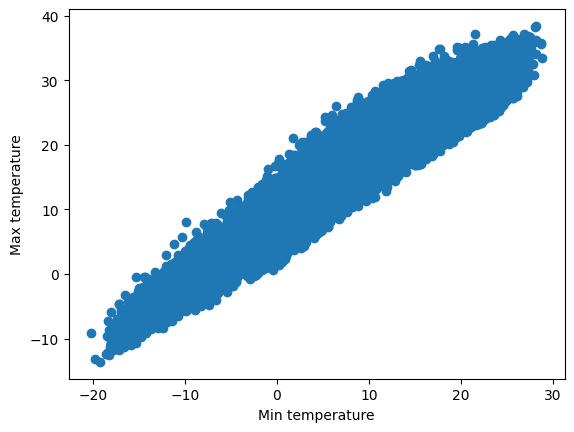

In [7]:
plt.scatter(min,max)
plt.xlabel('Min temperature')
plt.ylabel('Max temperature')

We can an evident correlation, when the minimum temperature is high, the maximum temperature is even higher, nevertheless the gap between the two is usually small (follows the curve y = x)

In [9]:
minmean,maxmean=min.mean(),max.mean() #computing the parameters used in equation

minstd,maxstd=min.std(),max.std()

r=((min-minmean)*(max-maxmean)).mean()/minstd/maxstd #"manually" computing the r coefficient
print(r)

0.9619932180990356


1-2 between lowest temperature and average temperature

Text(0, 0.5, 'Avg temperature')

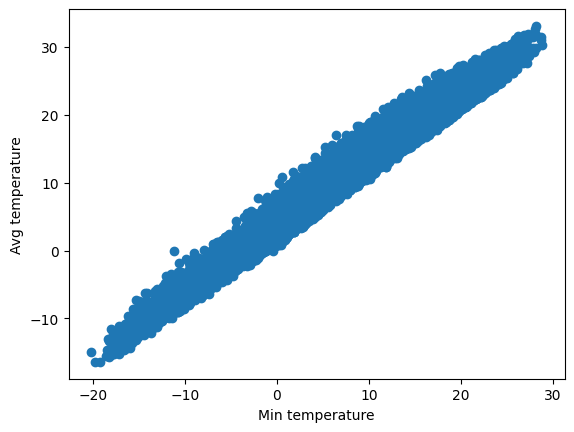

In [10]:
plt.scatter(min,mean_arr)
plt.xlabel('Min temperature')
plt.ylabel('Avg temperature')

Once again we visually notice a correlation between the average temperature and the minimum temperatures

In [11]:
print(np.corrcoef(min,mean_arr)) #computing the coefficient using numpy

[[1.         0.98914817]
 [0.98914817 1.        ]]


1-3 between average temperature and highest temperature 

Text(0, 0.5, 'Max temperature')

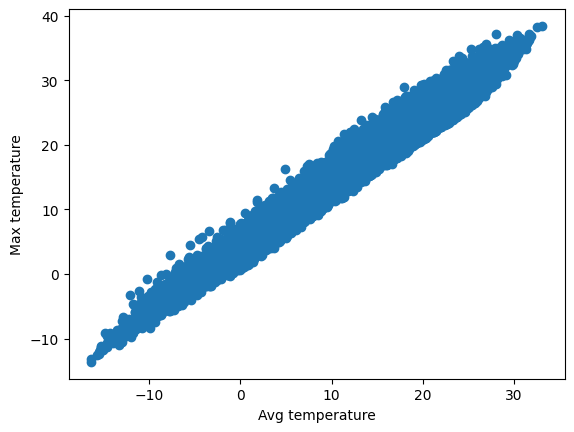

In [12]:
plt.scatter(mean_arr,max)
plt.xlabel('Avg temperature')
plt.ylabel('Max temperature')

In [ ]:
print(np.corrcoef(mean_arr,max)) #Using numpy again

[[1.         0.98928008]
 [0.98928008 1.        ]]


## Calculating autocorrelations

2-1 highest temperature

<ipython-input-16-72b12b4f55aa>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var = (seoul_t.var()).var()


7.978347428678658


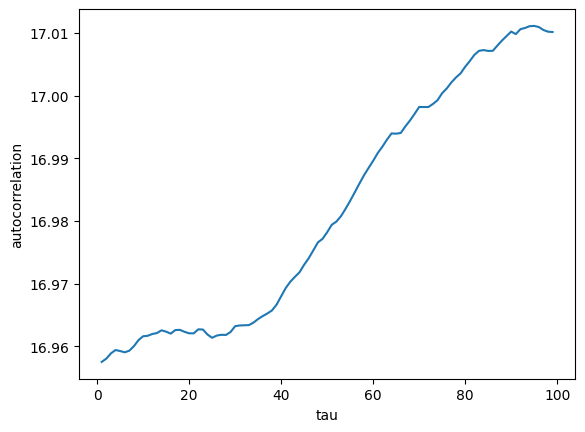

In [16]:
mean = (min.mean()+max.mean()+mean_arr.mean())/3
var = (seoul_t.var()).var()
print(var)
res = []
data = max

for tau in range(1,100):
  arr1 = data[:-tau] - mean
  arr2 = data[tau:] - mean
  auto = (arr1*arr2).mean()/var
  res.append([tau,auto])

res = np.array(res)
plt.plot(res[:,0],res[:,1])
plt.xlabel("tau") 
plt.ylabel("autocorrelation")
plt.show()

2-2 lowest temperature

<ipython-input-17-0eaad6645da3>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var = (seoul_t.var()).var()


7.978347428678658


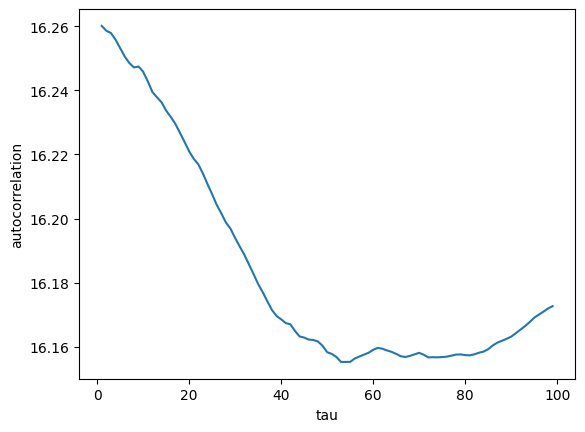

In [17]:
mean = (min.mean()+max.mean()+mean_arr.mean())/3
var = (seoul_t.var()).var()
print(var)
res = []
data = min

for tau in range(1,100):
  arr1 = data[:-tau] - mean
  arr2 = data[tau:] - mean
  auto = (arr1*arr2).mean()/var
  res.append([tau,auto])

res = np.array(res)
plt.plot(res[:,0],res[:,1])
plt.xlabel("tau") 
plt.ylabel("autocorrelation")
plt.show()